In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

# Load the Diabetes dataset
data = load_diabetes()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Ridge Regression model
alpha = 1.0  # Adjust the regularization strength (alpha) as needed
model = Ridge(alpha=alpha)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-square:", r2)

Mean Squared Error: 3077.41593882723
R-square: 0.41915292635986545


In [ ]:
import pandas as pd
data = pd.read_csv('/content/HousingData.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
data.shape

(506, 14)

In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
filtered_data = data[(data['MEDV'] >= 24) & (data['MEDV'] < 24.5)][['MEDV','AGE']]

In [ ]:
print(filtered_data)

     MEDV    AGE
0    24.0   65.2
70   24.2    6.6
74   24.1    NaN
158  24.3  100.0
201  24.1   38.4
206  24.4   52.5
208  24.4   59.1
230  24.3   68.1
235  24.0   61.5
246  24.3   34.9
250  24.4   13.0
272  24.4   58.7
351  24.1   35.9


In [ ]:
age_with_nan = data[data['AGE'].isna()]
age_with_nan

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
74,0.07896,0.0,12.83,0.0,0.4370,6.273,NaN,4.2515,5,398,18.7,394.92,6.78,24.1
103,0.21161,0.0,8.56,0.0,0.5200,6.137,NaN,2.7147,5,384,20.9,394.47,13.44,19.3
126,0.38735,0.0,25.65,0.0,0.5810,5.613,NaN,1.7572,2,188,19.1,359.29,27.26,15.7
138,0.24980,0.0,21.89,0.0,0.6240,5.857,NaN,1.6686,4,437,21.2,392.04,21.32,13.3
150,1.65660,0.0,19.58,0.0,0.8710,6.122,NaN,1.6180,5,403,14.7,372.80,14.10,21.5
155,3.53501,0.0,19.58,1.0,0.8710,6.152,NaN,1.7455,5,403,14.7,88.01,15.02,15.6
163,1.51902,0.0,19.58,1.0,0.6050,8.375,NaN,2.1620,5,403,14.7,388.45,3.32,50.0
173,0.09178,0.0,NaN,0.0,0.5100,6.416,NaN,2.6463,5,296,16.6,395.50,9.04,23.6
193,0.02187,60.0,2.93,0.0,0.4010,6.800,NaN,6.2196,1,265,15.6,393.37,5.03,31.1
215,0.19802,0.0,10.59,0.0,0.4890,6.182,NaN,3.9454,4,277,18.6,393.63,9.47,25.0


In [ ]:
c_m = data.corr(method='pearson')
age_c = c_m['AGE']
c_ = age_c.abs().sort_values(ascending=False)
c_

AGE        1.000000
DIS        0.744844
NOX        0.731548
INDUS      0.638431
LSTAT      0.602891
ZN         0.563801
TAX        0.509114
RAD        0.458349
MEDV       0.394656
CRIM       0.354342
B          0.275303
PTRATIO    0.269226
RM         0.247337
CHAS       0.078831
Name: AGE, dtype: float64

In [ ]:
age_with_nan = data[data['AGE'].isna()][['AGE','DIS','NOX','INDUS','LSTAT','ZN','MEDV']]

In [ ]:
age_with_nan

,AGE,DIS,NOX,INDUS,LSTAT,ZN,MEDV
74,NaN,4.2515,0.4370,12.83,6.78,0.0,24.1
103,NaN,2.7147,0.5200,8.56,13.44,0.0,19.3
126,NaN,1.7572,0.5810,25.65,27.26,0.0,15.7
138,NaN,1.6686,0.6240,21.89,21.32,0.0,13.3
150,NaN,1.6180,0.8710,19.58,14.10,0.0,21.5
155,NaN,1.7455,0.8710,19.58,15.02,0.0,15.6
163,NaN,2.1620,0.6050,19.58,3.32,0.0,50.0
173,NaN,2.6463,0.5100,NaN,9.04,0.0,23.6
193,NaN,6.2196,0.4010,2.93,5.03,60.0,31.1
215,NaN,3.9454,0.4890,10.59,9.47,0.0,25.0


In [ ]:
import pandas as pd

# Assuming you have your data loaded in a DataFrame called 'data'

# Fill NaN values in the "AGE" column with the average of the adjacent values
data['AGE'].fillna((data['AGE'].shift() + data['AGE'].shift(-1)) / 2, inplace=True)

# Now, the NaN values in the "AGE" column have been filled with the average of the neighboring values.


In [ ]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
data['CRIM']= data['CRIM'].fillna((data['CRIM']).mean())

In [ ]:
data.isnull().sum()

CRIM        0
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
median_zn = data['ZN'].mean()
mode_INDUS = data['INDUS'].mode()[0]# Mode returns a Series, so we take the first value

In [ ]:
data['ZN'].fillna(median_zn, inplace=True)
data['INDUS'].fillna(mode_INDUS,inplace=True)

In [ ]:
data.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS       20
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
mean_chas = data['CHAS'].mean()
mean_lstat = data['LSTAT'].mean()
data[['CHAS','LSTAT']] = data[['CHAS','LSTAT']].fillna({'CHAS':mean_chas, 'LSTAT':mean_lstat})

In [ ]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
data.drop_duplicates()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.480000,22.0


In [ ]:
data.shape

(506, 14)

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2


In [ ]:
mean_non_zero = data[data['ZN'] != 0.0]['ZN'].mean()
data.loc[data['ZN']==0.0, 'ZN'] = mean_non_zero

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.000000,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,38.857799,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,38.857799,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,38.857799,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,38.857799,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2


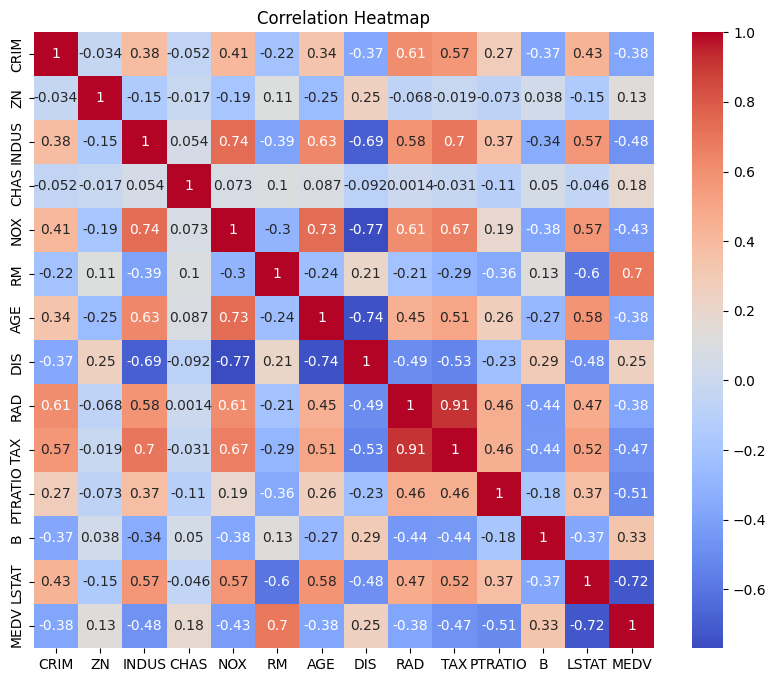

In [ ]:
import seaborn as sns
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


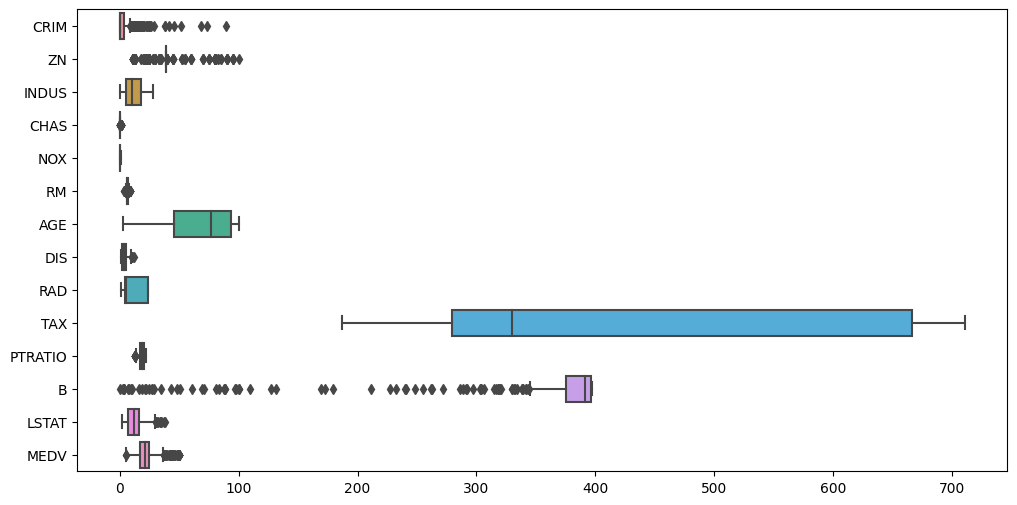

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for each feature
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, orient='h')
plt.show()


In [ ]:
from scipy import stats

# Calculate the Z-scores for each feature
z_scores = stats.zscore(data)

# Define a threshold for identifying outliers (e.g., 2 standard deviations)
threshold = 2

# Find outliers for each feature
outliers = (z_scores > threshold).any(axis=0)

# Display the features with outliers
features_with_outliers = data.columns[outliers]
print("Features with outliers:", features_with_outliers)


Features with outliers: Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'LSTAT', 'MEDV'], dtype='object')


In [ ]:
# from scipy import stats

# Calculate the Z-scores for each feature
# z_scores = stats.zscore(data)

# Define a threshold for identifying outliers (e.g., 2 or 3 standard deviations)
# threshold = 3

# Find and remove outliers for each feature
# data_no_outliers = data[(z_scores < threshold).all(axis=1)]


In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.000000,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,38.857799,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,38.857799,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,38.857799,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,38.857799,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2


In [ ]:
X = data.drop(columns = 'MEDV', axis = 1 )
y = data['MEDV']

In [ ]:
X.shape

(506, 13)

In [ ]:
y.shape

(506,)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[-0.42232846, -1.42456987, -1.32508641, ..., -1.45900038,
         0.44105193, -1.10414593],
       [-0.41986984,  0.        , -0.62823532, ..., -0.30309415,
         0.44105193, -0.51035272],
       [-0.41987219,  0.        , -0.62823532, ..., -0.30309415,
         0.39642699, -1.23974774],
       ...,
       [-0.41595175,  0.        ,  0.0832555 , ...,  1.17646583,
         0.44105193, -1.00993835],
       [-0.41023216,  0.        ,  0.0832555 , ...,  1.17646583,
         0.4032249 , -0.8900378 ],
       [-0.41751548,  0.        ,  0.0832555 , ...,  1.17646583,
         0.44105193, -0.69020355]])

In [ ]:
import pandas as pd

# Assuming you have your data loaded in a DataFrame called 'data'
correlation_matrix = data.corr()
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.033586,0.378203,-0.052223,0.410377,-0.215434,0.342017,-0.366523,0.608886,0.566528,0.273384,-0.370163,0.434044,-0.379695
ZN,-0.033586,1.000000,-0.151737,-0.017418,-0.194971,0.112294,-0.252573,0.248167,-0.067711,-0.018758,-0.072857,0.037623,-0.150355,0.132696
INDUS,0.378203,-0.151737,1.000000,0.054188,0.735691,-0.389362,0.630808,-0.687672,0.580946,0.697661,0.372694,-0.344783,0.569819,-0.478199
CHAS,-0.052223,-0.017418,0.054188,1.000000,0.073286,0.102284,0.087193,-0.091680,0.001425,-0.031483,-0.109310,0.050055,-0.046166,0.179882
NOX,0.410377,-0.194971,0.735691,0.073286,1.000000,-0.302188,0.731471,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.572379,-0.427321
RM,-0.215434,0.112294,-0.389362,0.102284,-0.302188,1.000000,-0.241441,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.602962,0.695360
AGE,0.342017,-0.252573,0.630808,0.087193,0.731471,-0.241441,1.000000,-0.742121,0.452694,0.505108,0.262821,-0.272006,0.578607,-0.376922
DIS,-0.366523,0.248167,-0.687672,-0.091680,-0.769230,0.205246,-0.742121,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483429,0.249929
RAD,0.608886,-0.067711,0.580946,0.001425,0.611441,-0.209847,0.452694,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.468440,-0.381626
TAX,0.566528,-0.018758,0.697661,-0.031483,0.668023,-0.292048,0.505108,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524545,-0.468536


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame of the independent variables
X = data[['CRIM', 'ZN', 'INDUS', 'CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']]

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,Variable,VIF
0,CRIM,2.038228
1,ZN,9.280836
2,INDUS,12.506935
3,CHAS,1.174469
4,NOX,72.185334
5,RM,133.859309
6,AGE,21.014856
7,DIS,11.930086
8,RAD,15.228904
9,TAX,58.561614


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming you have your features 'X' and target 'y' ready
X = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']]
y = data['MEDV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit a Ridge regression model
ridge = Ridge(alpha=0.001)  # You can adjust the alpha (regularization strength)
ridge.fit(X_train, y_train)

# Make predictions
y_pred = ridge.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 26.24539166461629


In [ ]:
from sklearn.linear_model import Lasso

# Initialize and fit a Lasso regression model
lasso = Lasso(alpha=1.0)  # You can adjust the alpha (regularization strength)
lasso.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso.predict(X_test)

# Evaluate the Lasso model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Mean Squared Error (Lasso):", mse_lasso)


Mean Squared Error (Lasso): 26.24672098156132


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values to search
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Create a Ridge regression model
ridge = Ridge()

# Perform a grid search to find the best alpha value using cross-validation
param_grid = {'alpha': alpha_values}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha for Ridge:", best_alpha)


Best Alpha for Ridge: 0.001
